### k 최근접이웃 알고리즘
* 머신러닝 분류에 자주 사용되는 대표 알고리즘
* 얼굴인식, 개인영화추천, 질병 유전자 패턴 식별에 활용
* KNN의 K는 가장 가까운 이웃 '하나'가 아니고훈련데이터 중 새로운 데이터와 가장 가까운 K개의 이웃을 찾는다는 의미
* 즉, 하나의 관측값은 거리가 가까운 k개의 이웃 관측값과 비슷한 특성을 갖는다고 가정함
* 따라서, k개 이웃의 레이블들 중 다수결로 가장 많은 레이블 값을 결과로 반환
* KNN 알고리즘에서는 k를 얼마나 설정하느냐에 따라 결과와 성능이 달라짐
   + k가 작으면 데이터의 범위가 좁아짐 - 과적합 위험
   + k가 크면 데이터의 범위가 넓어짐 - 일반화 위험
   + 일반적으로 k값은 데이터 총 건수에 제곱근을 씌운 값
* 제대로 된 분석을 위해서는 각 변수에 대해 표준화 작업이 필요할 수 있음
* 거리 측정 알고리즘 : 유클리드, minkowski, 맨해튼

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# 데이터 적재 및 분할
iris = load_iris()
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, stratify=iris.target,test_size=0.3, random_state=2111121455)

In [3]:
# knn 분석 1
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(1.0, 0.9333333333333333)

In [4]:
# knn 분석 2
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9809523809523809, 0.9333333333333333)

In [5]:
# knn 분석 3
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9809523809523809, 0.9333333333333333)

In [6]:
# 최적의 k값을 찾기 위해 교차검증 실시
scores = []
for k in range(1, 30+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, Xtrain, ytrain,cv=10, scoring='accuracy')
    scores.append(score.mean())

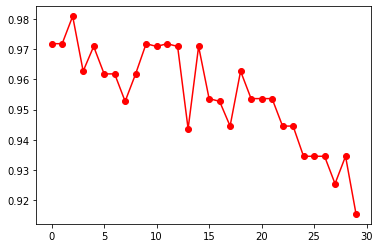

In [7]:
# 결과 시각화
plt.plot(scores, 'ro-')

### k값 선택기준
* k값에 따라 정확도가 점점 줄다가 어느 순간 확 주는 지점이 생기는데 그래프상에서는 가늠하기 다소 어려움
* 자주 나타나는 정확도 지표 중 선두에 나오는 지점
* 너무 높은 정확도는 과적합의 위험이 있기 때문에 주의

### KNN 알고리즘을 이용해서 당도, 아삭함을 기준으로 과일/채소/단백질을 구분함
*  당도 6, 아삭함 4인 토마토는 과일인가 채소인가?

In [8]:
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [9]:
# 데이터 적재
fresh = pd.read_csv('fresh.csv', encoding='euc-kr')
fresh.columns = ['name','sweet','crunchy','class']
fresh.head()

,name,sweet,crunchy,class
0,포도,8,5,과일
1,생선,2,2,단백질
2,당근,6,10,채소
3,오렌지,7,3,과일
4,샐러리,3,8,채소


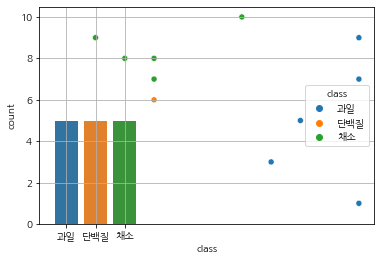

In [10]:
# 시각화
sns.countplot(x='class', data=fresh)
sns.scatterplot(x='sweet', y='crunchy',data=fresh, hue='class')
plt.grid()

In [11]:
# 데이터 전처리
fresh['target'] = pd.Categorical(fresh['class'])
fresh['target'] = fresh['target'].cat.codes
fresh.head()

,name,sweet,crunchy,class,target
0,포도,8,5,과일,0
1,생선,2,2,단백질,1
2,당근,6,10,채소,2
3,오렌지,7,3,과일,0
4,샐러리,3,8,채소,2


In [12]:
# 데이터 분리
data = fresh.iloc[:, 1:3]
target = fresh.target

In [13]:
# 교차검증으로 적절한 k 알아내기
scores = []
for k in range(1, 10+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, data, target,cv=5, scoring='accuracy')
    scores.append(score.mean())

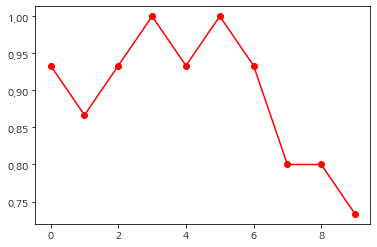

In [14]:
plt.plot(scores, 'ro-')
# k = 3으로 채택

In [15]:
# 채택된 k값으로 모델 생성
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(data, target)
knc.score(data, target)

0.9333333333333333

In [16]:
# 당도 6, 아삭함 4인 토마토는 과일인가 채소인가?
newOne = np.array([[6,4]])
pred = knc.predict(newOne)
pred   # 0 - 과일

/home/hadoop/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int8)

### 농구선수 게임데이터를 이용해서 포지션 예측
* 2017 NBA 농구선수의 실제 데이터를 참고
* player 선수명, pos 포지션, 3p 3점슛 성공횟수
* 2p 2점슛 성공횟수, TRB 리바운드 성공횟수
* AST 어시스트 성공횟수, STL 스틸 성공횟수, BLK 블로킹 성공횟수
* SG 슈팅가드(장거리 슛터) 와 C 센터 (골대 근처 블로킹,스틸,리바운드 전문)를 구분하는 모델 생성

In [18]:
# 데이터 적재
player = pd.read_csv('basketball_stat.csv')
player.head()
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


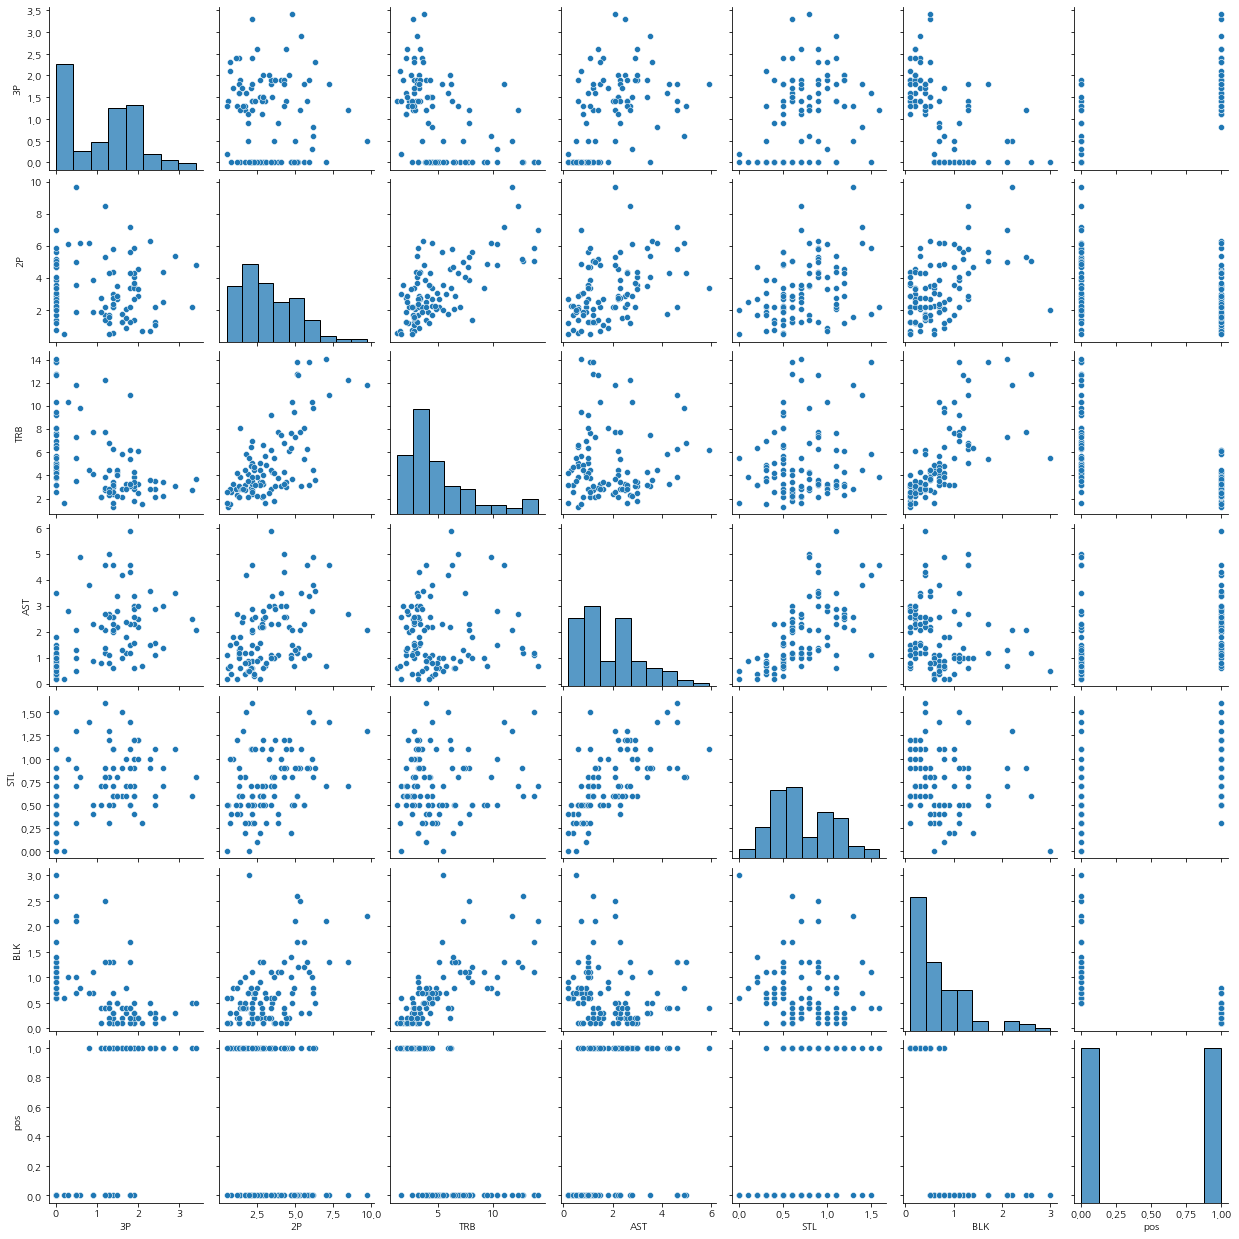

In [22]:
# 시각화
sns.pairplot(player.iloc[:, 2:])

<AxesSubplot:xlabel='Pos', ylabel='count'>

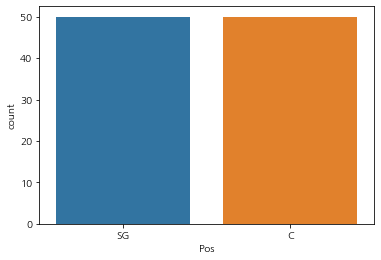

In [23]:
sns.countplot(x='Pos', data=player)

In [24]:
# 전처리
player['pos'] = pd.Categorical(player['Pos'])
player['pos'] = player['pos'].cat.codes

In [26]:
# 데이터 나누기
data = player.iloc[:, 2:]
target = player.pos
Xtrain, Xtest, ytrain, ytest =train_test_split(data, target, stratify=target,random_state=2111121625)

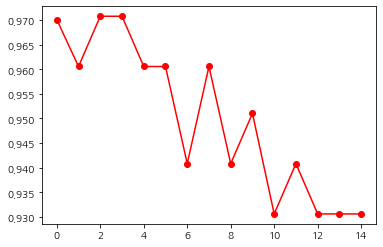

In [27]:
# 교차검증 후 최적 k값 산출
scores = []
for k in range(1, 15+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, data, target,cv=7, scoring='accuracy')
    scores.append(score.mean())
plt.plot(scores, 'ro-')
# k = 5 로 채택

In [28]:
# 채택된 k값으로 모델 생성
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)
# 0.99, 0.93

(0.9866666666666667, 0.96)

<AxesSubplot:xlabel='STL', ylabel='2P'>

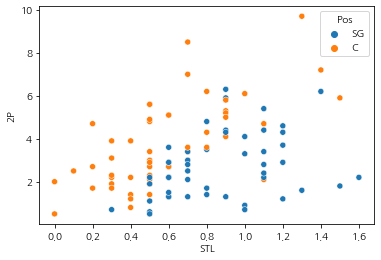

In [29]:
# 컬럼 축소를 위한 시각화
# 스틸/2점슛
sns.scatterplot(x='STL', y='2P', data=player, hue='Pos')

<AxesSubplot:xlabel='AST', ylabel='2P'>

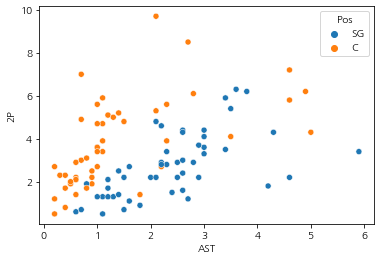

In [30]:
# 어시스트/2점슛
sns.scatterplot(x='AST', y='2P', data=player, hue='Pos')
# 슈팅가드와 센터를 구분지을 경계가 명확하지 않음

In [31]:
# 블로킹/3점슛



# 리바운드/3점슛



# 어시스트/3점슛



# 블로킹/2점슛

In [32]:
# 따라서, 3점슛, 블로킹, 리바운드등을 분석이 사용해 봄
data = player.iloc[:, [2,4,7]]
target = player.Pos

In [33]:
# 레이블인코딩의 또 다른 방법
target = target.map({'C':0, 'SG':1})

In [34]:
# 데이터 나누기
Xtrain, Xtest, ytrain, ytest =train_test_split(data, target, stratify=target,random_state=2111121705)

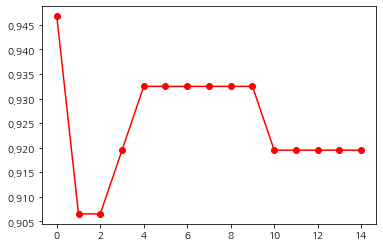

In [36]:
# 교차검증 후 최적 k값 산출
scores = []
for k in range(1, 15+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, Xtrain, ytrain,cv=7, scoring='accuracy')
    scores.append(score.mean())
plt.plot(scores, 'ro-')

# k는 3 또는 5으로 채택

In [37]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)
# 0.93, 0.88

(0.9333333333333333, 0.88)